In [1]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler


In [2]:
#load the dataset
df = pd.read_csv('customer_data_records.csv')
print(df.head())

   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                 117                      20
1           2                 107                      59
2           3                  29                      36
3           4                 121                      19
4           5                  86                      90


In [3]:
#extract relevant features for clustering
x = df.iloc[:, [1, 2]].values  # Extract columns 1 and 2 for clustering

In [4]:
#scale the features
# Scaling is important for KMeans to ensure all features contribute equally
scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [5]:
#elbow method to find the optimal number of clusters
wcss = []#list to store within-cluster sum of squares
for i in range(1, 11):#test for 1 to 10 clusters
    #create KMeans model and fit it to the scaled data
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

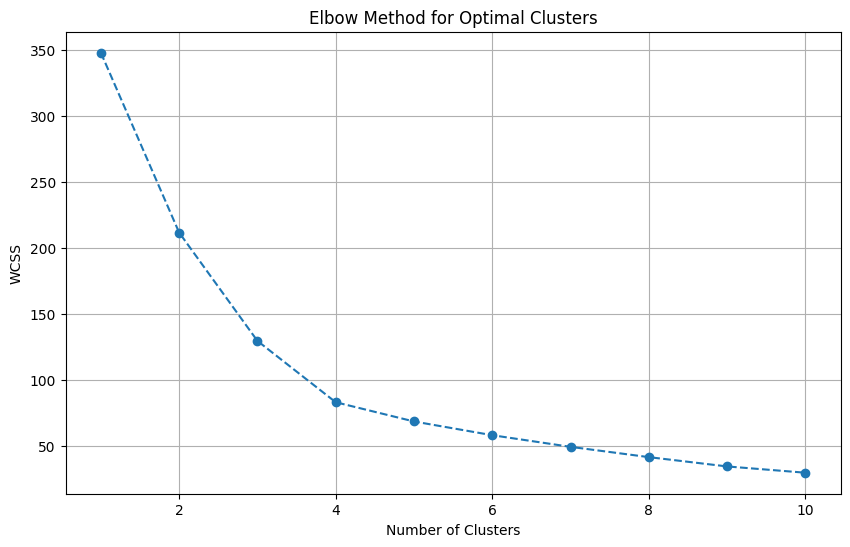

In [6]:
#plot the elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [7]:
df.isnull().sum()  # check for missing values

CustomerID                0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [22]:
# Based on the Elbow method, let's assume the optimal number of clusters is 5

optimal_clusters = 5  # let's say we determined 5 clusters from the Elbow method

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)  # Create KMeans object with optimal clusters
kmeans.fit(x_scaled)  # Fit the model to the scaled data

,n_clusters,5
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [29]:
# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_  # Creates new column 'Cluster' in the data DataFrame

In [30]:
# Add cluster labels to the original data
df['Cluster'] = kmeans.labels_  # Creates new column 'Cluster' in the data DataFrame

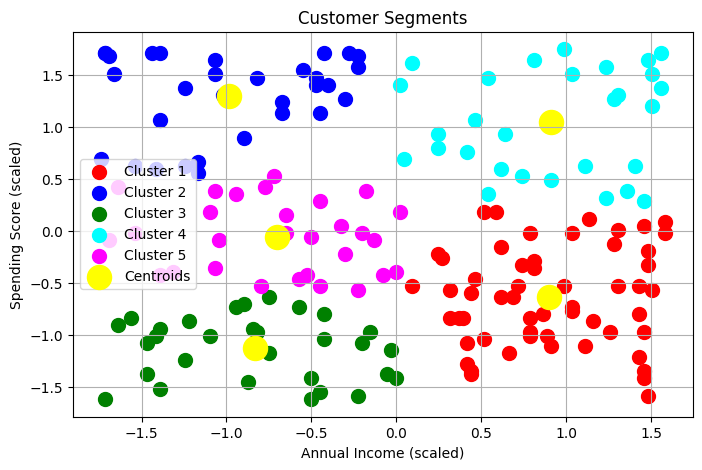

In [32]:
# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(x_scaled[kmeans.labels_ == 0, 0], x_scaled[kmeans.labels_ == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x_scaled[kmeans.labels_ == 1, 0], x_scaled[kmeans.labels_ == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x_scaled[kmeans.labels_ == 2, 0], x_scaled[kmeans.labels_ == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x_scaled[kmeans.labels_ == 3, 0], x_scaled[kmeans.labels_ == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x_scaled[kmeans.labels_ == 4, 0], x_scaled[kmeans.labels_ == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
#add cluster labels to the dataframe
df['Cluster'] = kmeans.labels_
print(df.head(10))

   CustomerID  Annual Income (k$)  Spending Score (1-100)  Cluster
0           1                 117                      20        0
1           2                 107                      59        0
2           3                  29                      36        1
3           4                 121                      19        0
4           5                  86                      90        1
5           6                  35                      67        1
6           7                 117                      19        0
7           8                 136                      20        0
8           9                  89                      96        1
9          10                 102                      71        0


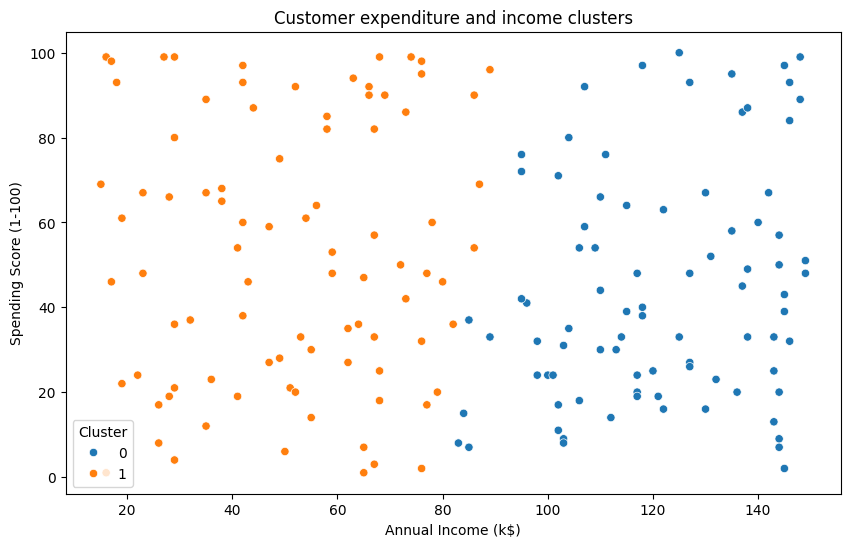

In [8]:
#visualize the clusters
plt.figure(figsize=(10, 6))
snb.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster')
plt.title('Customer expenditure and income clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()